# Code for varying final time and amount of data points for neural ODE

In this code, we experiment with changing the simulation end points, as well as the amount of data points in the data set, to see where limits are of the neural ODE approach to inferring the GRN from data

In [1]:
import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
import matplotlib.pyplot as plt
import numpy as np

# Juptyer magic: For export. Makes the plots size right for the screen 
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_formats = ['svg'] 


torch.backends.cudnn.deterministic = True
seed = np.random.randint(1,200)
seed = 56
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
print(seed)
g = torch.Generator()
g.manual_seed(seed)

56


check


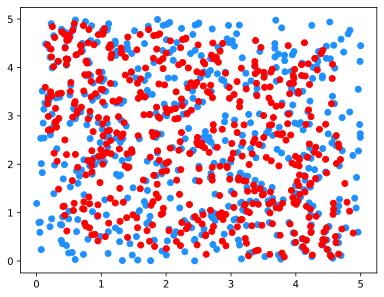

No change applied to TS or repr data


In [12]:
data_noise = 0.0
plotlim = [-0.2, 1.2]
subfolder = 'traj_TS'


from models.training import create_dataloader
dataloader, dataloader_viz = create_dataloader('TS', noise = data_noise, plotlim = plotlim, random_state = seed, label = 'vector', deltat=0.1, batch_size=500)

In [13]:
#Import of the model dynamics that describe the neural ODE
#The dynamics are based on the torchdiffeq package, that implements ODE solvers in the pytorch setting
from models.neural_odes import NeuralODE

#for neural ODE based networks the network width is constant. In this example the input is 2 dimensional
hidden_dim, data_dim = 2, 2 
augment_dim = 0

#T is the end time of the neural ODE evolution, num_steps are the amount of discretization steps for the ODE solver
T, num_steps = 20, 20
bound = 0.
fp = False #this recent change made things not work anymore
cross_entropy = False
turnpike = False

non_linearity = 'tanh' #'relu' #
architecture = 'inside' #outside

In [14]:
num_epochs = 160 #number of optimization runs in which the dataset is used for gradient decent
eps = 0.2

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=augment_dim, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3)

from models.training import doublebackTrainer

trainer_anode = doublebackTrainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps_comp = 0.2) 
# verbose = True for more details
l = trainer_anode.train(dataloader, num_epochs)


Iteration 0/7
Loss: 10.624
Epoch 1: 10.830

Iteration 0/7
Loss: 10.051
Epoch 2: 10.122

Iteration 0/7
Loss: 8.045
Epoch 3: 9.182

Iteration 0/7
Loss: 9.083
Epoch 4: 7.951

Iteration 0/7
Loss: 7.228
Epoch 5: 6.922

Iteration 0/7
Loss: 4.563
Epoch 6: 5.963

Iteration 0/7
Loss: 4.697
Epoch 7: 5.516

Iteration 0/7
Loss: 5.031
Epoch 8: 5.095

Iteration 0/7
Loss: 5.172
Epoch 9: 4.732

Iteration 0/7
Loss: 4.322
Epoch 10: 4.418

Iteration 0/7
Loss: 3.685
Epoch 11: 4.404

Iteration 0/7
Loss: 4.442
Epoch 12: 4.071

Iteration 0/7
Loss: 3.333
Epoch 13: 3.857

Iteration 0/7
Loss: 4.152
Epoch 14: 3.933

Iteration 0/7
Loss: 3.595
Epoch 15: 3.904

Iteration 0/7
Loss: 3.749
Epoch 16: 3.810

Iteration 0/7
Loss: 3.520
Epoch 17: 3.815

Iteration 0/7
Loss: 3.374
Epoch 18: 3.887

Iteration 0/7
Loss: 4.322
Epoch 19: 3.826

Iteration 0/7
Loss: 3.497
Epoch 20: 3.921

Iteration 0/7
Loss: 3.893
Epoch 21: 3.794

Iteration 0/7
Loss: 3.925
Epoch 22: 3.821

Iteration 0/7
Loss: 3.875
Epoch 23: 3.791

Iteration 0/7
L

In [15]:
print(l)
for param in anode.named_parameters():
    print(param)



3.847496747970581
('flow.dynamics.fc2_time.0.weight', Parameter containing:
tensor([[ 0.7311,  0.1881],
        [-0.2766,  0.5487]], requires_grad=True))
('flow.dynamics.fc2_time.0.bias', Parameter containing:
tensor([0.0514, 0.2431], requires_grad=True))
('flow.dynamics.fc2_time.1.weight', Parameter containing:
tensor([[-0.2177,  0.0644],
        [ 0.2622, -0.0404]], requires_grad=True))
('flow.dynamics.fc2_time.1.bias', Parameter containing:
tensor([-0.2942,  0.3089], requires_grad=True))
('flow.dynamics.fc2_time.2.weight', Parameter containing:
tensor([[ 0.0219, -0.2222],
        [-0.2055,  0.0976]], requires_grad=True))
('flow.dynamics.fc2_time.2.bias', Parameter containing:
tensor([ 0.2244, -0.0595], requires_grad=True))
('flow.dynamics.fc2_time.3.weight', Parameter containing:
tensor([[-0.2391, -0.1456],
        [-0.0839, -0.3666]], requires_grad=True))
('flow.dynamics.fc2_time.3.bias', Parameter containing:
tensor([-0.5164, -0.4874], requires_grad=True))
('flow.dynamics.fc2_time